Привет, меня зовут Люман Аблаев. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ..
</div>
<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<font color='orange' style='font-size:24px; font-weight:bold'>Полезные ссылки:</font>
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k .

<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
- Приятное оформление выводов и структурированность кода в целом!  Приятно проверять такие работы.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
- Жду твой обновленный проект =)


<font color='orange' style='font-size:24px; font-weight:bold'>Общее впечатление[2]</font>
- Спасибо за твою оперативность!
- Многие замечания учтены, теперь работа на должном уровне. (но есть важные моменты, которые желательно улучшить)
- Было приятно проверять твою работу. Удачи в продолжении обучения!


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

**План:**
- загрузим данные
- проанализируем их
- обучим модели
- подберем лучшие гиперпараметры
- проверим результаты на тестовой выборке
- сделаем вывод

In [1]:
# импорт всех библиотек и метрик 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error
import warnings


<div class="alert alert-block alert-success">
<b>Успех:</b> Импорты  на месте
</div>


## Подготовка

In [2]:
taxi = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col = 'datetime')
display(taxi.head())
print(taxi.info())
taxi_shape = taxi.shape
print(taxi_shape)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB
None
(26496, 1)




<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что использолованы параметры index_col и parse_dates
</div>


*Данные просмотрели. Работа предстоит с датафреймом в 26496 строк, а данные как мы видим собраны в интервале с 1 марта по 31 августа 2018 года. Чуть позже мы в этом окончательно убедимся, а пока выполним ресемплирование данных по одному часу*

In [3]:
taxi.sort_index(inplace=True)
taxi = taxi.resample('1H').sum()

In [4]:
print(taxi.index.max() - taxi.index.min())
print(taxi.index.max(), taxi.index.min(), sep='    ')

183 days 23:00:00
2018-08-31 23:00:00    2018-03-01 00:00:00


*Как и было подмечено ранее, интервал с начала весны по конец лета, целых 184 часа!*


<div class="alert alert-block alert-success">
<b>Успех:</b> Первичный осмотр проведен, ресемпилнг был сделан верно.
</div>




## Анализ

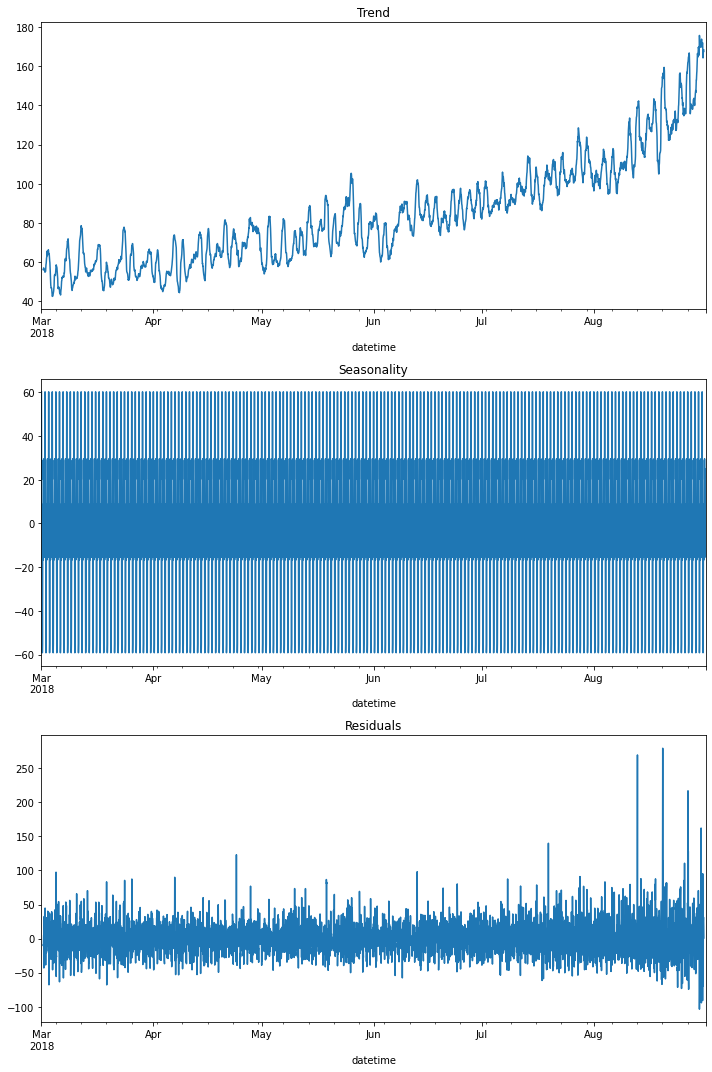

In [5]:
# посмотрим на графики тренда, сезонности и остатка
decomposed = seasonal_decompose(taxi)

plt.figure(figsize=(10, 15))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')

plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

*По первому графику наблюдаем увеличение тренда в сторону последних месяцев лета. Тренд с ускорением. Оно и логично, июль и август самые частые месяцы для отпуска, а следовательно и заказов такси в аэропорт возрастает. Для более детального анализа рассмотрим чуть позже тренд относительно другого промежутка времени*

*По сезонности сказать из этого графика ничего нельзя, надо брать интервал поменьше*

*По графику остатков наблюдаем шум в районе августа (объясняется как раз тем, о чем я сказал ранее, что август - один из самых частых месяцев для отпусков), а так же видим небольшой шум по другим месяцам - скорее всего праздники или выходные. В остальном значение держит планку среднего*

Text(0.5, 1.0, 'Trend_of_august')

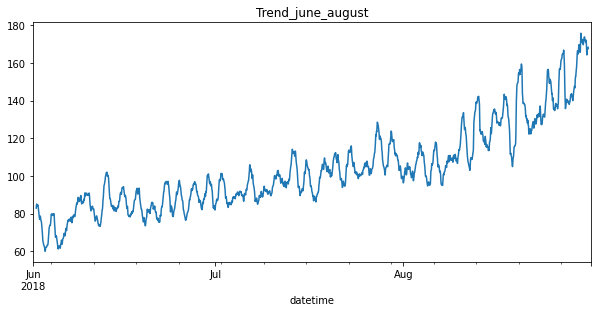

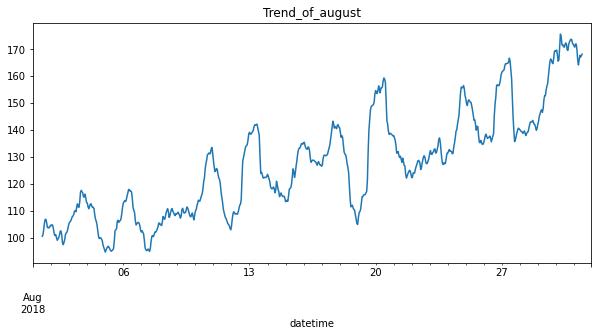

In [6]:
# посмотрим на тренд на протяжении всего лета, а так же в самом пиковом месяце - августе
plt.figure(figsize=(10, 15))
decomposed_june_august = seasonal_decompose(taxi['2018-06-01':'2018-08-31'])
plt.subplot(312)
decomposed_june_august.trend.plot(ax=plt.gca()) 
plt.title('Trend_june_august')

plt.figure(figsize=(10, 15))
decomposed_august_1 = seasonal_decompose(taxi['2018-08-01':'2018-08-31'])
plt.subplot(312)
decomposed_august_1.trend.plot(ax=plt.gca()) 
plt.title('Trend_of_august')

*Как можно увидеть, число заказов с начала лета и до конца растет, что говорит об августе как о самом пиковом в заказах месяце. В сам август число заказов так же растет с каждым днем*

Text(0.5, 1.0, 'Seasonality_week')

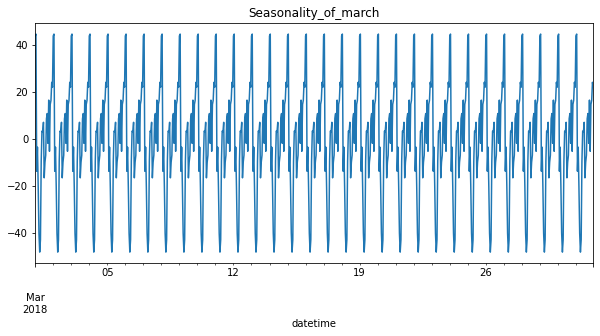

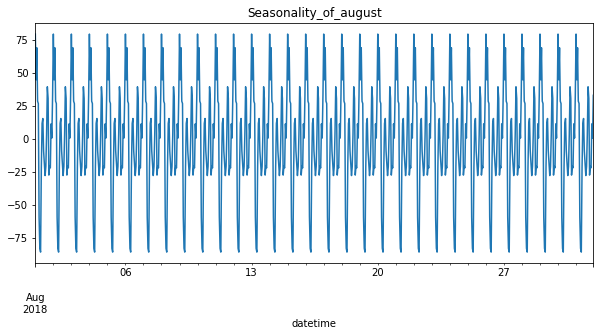

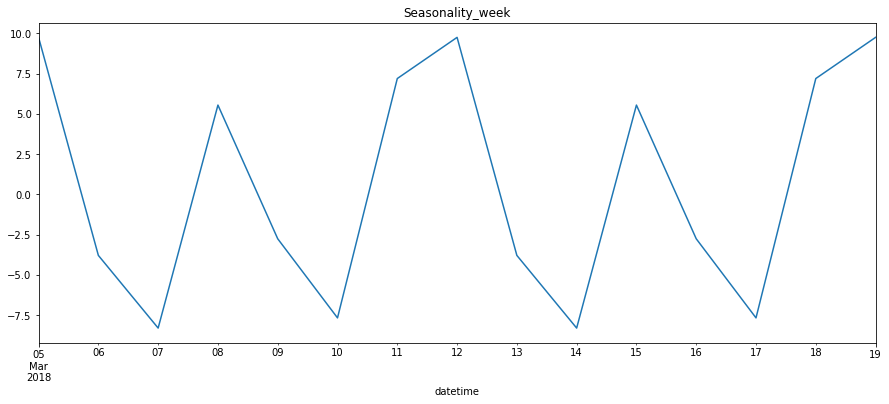

In [7]:
# посмотрим на графики сезонности в марте и в августе 

plt.figure(figsize=(10, 15))
decomposed_march = seasonal_decompose(taxi['2018-03-01':'2018-03-31'])
plt.subplot(312)
decomposed_march.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality_of_march')

plt.figure(figsize=(10, 15))
decomposed_august_2 = seasonal_decompose(taxi['2018-08-01':'2018-08-31'])
plt.subplot(312)
decomposed_august_2.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality_of_august')

# посмотрим сезонность по неделям
plt.figure(figsize=(15, 20))
taxi_seasonal_week = taxi.resample('1D').mean()
decomposed_all = seasonal_decompose(taxi_seasonal_week['2018-03-05':'2018-03-19'])
plt.subplot(312)
decomposed_all.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality_week')

*Сезонность объясняется временем: ночью заказов меньше, днем и вечером - больше.*

*Что касается недельной сезонности: я рассмотрел график с 5 по 19 марта (с 5, потому что это понедельник и так удобней рассматривать). Могу смело сказать, что в понедельник - самое большое число заказов. Далее оно падает и к среде доходит до минимума. После резкий рост приходится на четверг, а далее опять спад, достигающий своего минимума в субботу. В воскресенье опять скачок.*




<div class="alert alert-block alert-danger">
  
<b>Ошибка:</b>

Здесь важно дополнить вывод по аналитике: тренд постоянный, с ускорением? Растет число заказов по август? а в августе как обстоят дела?
    
    
Важно также изучить недельную сезонность. Удобнее всего ее увидеть, если сделать дополнительное ресемплирование (сохраняем в другую переменную, так как дальше в проекте будем работать с ресемплированием по часам и важно его не потерять) по дням. И также берем несколько недель.


По «остаткам» или шуму. Нужно посмотреть, на всем ли протяжении доля остатков одинаковая? Если если «остатков» к концу графика больше, значит в тестовую выборку попадет чуть больше данных, которые сложно объяснить и на которых модели будет сложнее предсказывать. Поэтому относительно большая (по сравнению с другими задачами машинного обучения) разница между метриками при обучении и исследовании, и между тестовой выборкой, не обязательно будет объясняться только переобучением модели.

       
</div>

<div class="alert alert-block alert-info">
    
<b>Совет:</b> Дополнительно  полезно оценивать стационарность ряда с помощью теста Дики-Фуллера: в реальных задачах с временными рядами, в особенности - с финансовыми данными или биржевыми котировками, график не всегда поможет достоверно оценить стационарность ряда, поэтому для оценки стационарности ряда лучше использовать тест Дики — Фуллера (подробнее о нём можно глянуть тут: https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html, а вот тут можно глянуть пример реализации: https://www.helenkapatsa.ru/tiest-diki-fulliera/) - он даст наиболее точный результат. Результат нужно проверить на уровнях значимости 1% и 5%, чтобы быть уверенным в выводах. Не забудь при применении теста сформулировать гипотезы - нулевая формулируется как гипотеза о нестацинарности ряда, а альтернативная - как гипотеза о стационарности ряда. Также при проведении теста не забывай, что мы сравниваем `p-value` с уровнем значимости `alpha`.
</div>




<div class="alert alert-block alert-warning">
<b>Изменения:</b> Добавил анализ по августу а так же сезонность по дням неделям. На счет шума не до конца понял, я же вроде выделил тот факт, что в августе их намного больше
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> По шуму  есть информация, но что она может для нас значить - не сильно на этом акцентировал внимание, хотя наблюдение важное.
</div>

## Обучение

In [8]:
# разобьем данные на выборки: тренировочную и тестовую в отношении 4:1
train, test = train_test_split(taxi, shuffle = False, test_size = 0.2)

print(train.shape, test.shape)

(3532, 1) (884, 1)


In [9]:
pred_previous = test.shift()
pred_previous.iloc[0] = train.iloc[-1]
rmse = mean_squared_error(test, pred_previous, squared = False)
print(rmse)

53.36807644753937


*Для начала неплохо, но нужно привести к значению меньше 48*

In [10]:
# теперь напишем функцию для создания обучающих признаков
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['day_of_week'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
    return data

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Наши календарные признаки подчеркивают сезонность. Относительно сезонности признаки идут на один уровень ниже. Если у нас суточная сезонность, то логично создавать признак часа (час одного дня похож на тот же час другого), если недельная - день недели.
    
Поэтому фактор месяц нам не сильно подходит: у нас в истории всего один март, май.... Да и горизонт прогноза - часы. 
    

А фактор час был бы уместен


</div>      

<div class="alert alert-block alert-warning">
<b>Изменения:</b> добавил столбец часа вместо месяца
</div>


<div class="alert alert-block alert-success">
<b>Успех[2]:</b> Есть
</div>

<div class="alert alert-info">
<b>Совет:</b>
Организация работы функции таким образом, чтобы она работала с глобальной переменной - не самая хорошая практика: если что-то пойдёт не так, придётся заново запускать весь процесс предобработки данных. 
        
Лучше организовывать функцию так, чтобы она принимала на вход набор данных и возвращала результат работы, чтобы его можно было сохранить в новой переменной. Концепт:
        
    def foo(df):
        df.dropna(inplace=True)
    
    foo(df)
        
В этом случае изменения необратимы, так как мы модифицировали глобальную переменную `df` - эту переменную придётся загружать в память заново и заново её обрабатывать.
        

    def foo(df):
        return df.dropna()
    
    foo(df)
        
        
Изменения будут необратимы и в таком случае, даже несмотря на на наличие `return`: несмотря на то, что работаем мы с локальной переменной, функция всё равно работает с объектом в памяти, связанным с глобальной переменной, пусть и через алиас.
        
    def foo(df):
        df_foo = df.copy()
        return df_foo.dropna()
    
    df_new = foo(df)
        
Здесь внутри функции исходный объект копируется, и работа уже происходит с новым объектом. В этом случае результат работы функции с исходными данными мы складываем в новую переменную - таким образом исходная глобальная переменная не подвергается вмешательству и сохранятся на случай, если функция сработала неправильно.
        
</div>



In [11]:
taxi = make_features(taxi, 25, 50)
display(taxi.head())

,num_orders,hour,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,1,3,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,2,3,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,4,3,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# разобьем на тренировочную и тестовую в соотношении 9:1
train, test = train_test_split(taxi, shuffle=False, test_size=0.1)
train = train.dropna()
train.head(5)

,num_orders,hour,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,lag_25,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-03 02:00:00,25,2,5,108.0,163.0,72.0,119.0,101.0,93.0,49.0,...,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,120.0,62.82
2018-03-03 03:00:00,64,3,5,25.0,108.0,163.0,72.0,119.0,101.0,93.0,...,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,75.0,60.84
2018-03-03 04:00:00,44,4,5,64.0,25.0,108.0,163.0,72.0,119.0,101.0,...,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,64.0,60.42
2018-03-03 05:00:00,15,5,5,44.0,64.0,25.0,108.0,163.0,72.0,119.0,...,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,20.0,59.88
2018-03-03 06:00:00,9,6,5,15.0,44.0,64.0,25.0,108.0,163.0,72.0,...,45.0,36.0,91.0,54.0,45.0,46.0,7.0,11.0,11.0,58.86


In [13]:
X_train = train.drop(columns = 'num_orders')
y_train = train['num_orders']
X_test = test.drop(columns = 'num_orders')
y_test = test['num_orders']

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
print("RMSE обучающей выборки:", (mean_squared_error(y_train, predict_train)) ** 0.5) 
#print("RMSE тестовой выборки:", (mean_squared_error(y_test, predict_test)) ** 0.5)

RMSE обучающей выборки: 25.805582252378898


<div class="alert alert-block alert-danger">

<b>Ошибка:</b> Не нужно оценивать все модели на тестовой выборке. Во время исследования мы должны работать и считать оценки для всех моделей либо на валидационной выборке (если она есть) либо с помощью кросс-валидационных методов. Затем выбираем лучшую модель на основе полученных оценок, после этого лучшую модель - ее нужно будет использовать для получения оценки на тестовой выборке и только ее.
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Понял, убрал оценку на тестовой выборке
</div>


<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> `predict_test = model.predict(X_test)` - получается избыточной
</div>

*Значение RMSE на тестовой выборке равно 46, что уже удовлетворяет условию (RMSE < 48), но попробуем подобрать другие гиперпараметры, чтобы попытаться еще уменьшить это значение*

In [15]:
taxi.describe().T

,count,mean,std,min,25%,50%,75%,max
num_orders,4416.0,84.422781,45.023853,0.00,54.00,78.00,107.000,462.00
hour,4416.0,11.500000,6.922970,0.00,5.75,11.50,17.250,23.00
day_of_week,4416.0,3.005435,1.990684,0.00,1.00,3.00,5.000,6.00
lag_1,4415.0,84.395470,44.992356,0.00,54.00,78.00,107.000,462.00
lag_2,4414.0,84.364069,44.949043,0.00,54.00,78.00,107.000,462.00
lag_3,4413.0,84.347156,44.940088,0.00,54.00,78.00,107.000,462.00
lag_4,4412.0,84.331369,44.932942,0.00,54.00,78.00,107.000,462.00
lag_5,4411.0,84.319655,44.931299,0.00,54.00,78.00,107.000,462.00
lag_6,4410.0,84.291837,44.898387,0.00,54.00,78.00,107.000,462.00
lag_7,4409.0,84.261737,44.858959,0.00,54.00,78.00,107.000,462.00


In [16]:
best_lag = 0
best_roll = 0
best_rmse = 48
for lag in range(1, 101, 10):
    for roll in range(47, 101, 10):
        taxi = make_features(taxi, lag, roll)
        
        train, test = train_test_split(taxi, shuffle=False, test_size=0.1)
        train = train.dropna()
        
        X_train = train.drop(columns = 'num_orders')
        y_train = train['num_orders']
        X_test = test.drop(columns = 'num_orders')
        y_test = test['num_orders']

        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_train)
        rmse = mean_squared_error(y_train, y_pred, squared = False)
        if rmse < best_rmse:
            best_rmse = rmse
            best_lag = lag
            best_roll = roll
            
print(f"RMSE на тренировочной выборке: {best_rmse} при лучшем lag: {best_lag} и лучшем roll(rolling): {best_roll}")

RMSE на тренировочной выборке: 22.543742403373123 при лучшем lag: 91 и лучшем roll(rolling): 97



<div class="alert alert-block alert-danger">
   
<b>Ошибка:</b> На тестовой выборке нельзя подбирать гиперпараметры - она выполняет другую роль.  Мы  ее должны отложить для тестирования, чтобы проверить, как хорошо настроенная модель будет работать на данных, под которые мы ее не подгоняли.
</div>


<div class="alert alert-block alert-warning">
<b>Изменения:</b> Понял, убрал тестовую выборку
</div>


<div class="alert alert-block alert-info">
   
<b>Совет[2]:</b> На тренировочной модели тоже не имеет смысла подбирать гиперпараметры - так ты получишь модель, которая лучше всего 'запоминает' данные, а не обобщает. Можно только либо выделять валидационную, либо кросс-валидацию применять.
    
P.S. Если использовать кросс-валидацию - то обязательно нужно использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html">TimeSeriesSplit</a>. Объект этого типа можно передать в параметр cv в метод основанный на кросс-валидации.
    
P.P.S Это должен быть красный коментарий, но учитывая, твой дедлайн я пойду на встречу, и надеюсь, что ты самостоятельно доработаешь данный раздел!
</div>



<div class="alert alert-block alert-info">
<b>Совет:</b> Данные параметры лучше подбирать логически
    
Lag: его называют ещё параметром авторегрессии.<br>Допустим lag=1 - учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - влияют на сегодняшние.<br>Lag=2: учитывает как позавчерашние продажи влияютна сегодняшние.....<br><br><br>
    
По скользящему среднего:<br>
Предположим rolling=10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. - это некое подобие тренда будет - средней линии. Т.е. - сглаживание колебаний/выбросов. Это легко увидеть на пределе: допустим длина ряда 100 дней. rolling(100) - это просто одно число - среднее всего ряда. <br><br><br>
    
    
    
**Обычно так происходит поиск параметров:**

1) узнаём , какая у нас сезонность: в нашем случае их две - часовая и день недели (суточная и недельная)<br>
2) Узнайм, какой у нас тренд. пусть будет пока rolling (24) - сутки<br>
3) строим модель (без лагов).<br>
4) строим график автокорреляции остатков (факт - прогноз). Если видим "зубья" на сезонных лагах: 24, 24*7 - то мы плохо жанной моделью учли сезонность.<br>
Если высокий "зуб"(столбец на графике) на на первом лаге, то ндо вводить в модель фактор lag=1.
и перестроить модель. И так по кругу.<br><br>   
    
Поэтому, если выставить сезонности - час и день недели, то дополнительные факторы желательно начинать с таких значений : лаг =1,2 а скользящее среднее = 24 (среднее за сутки).  В итоге модель будет приемлемая по точности и не много факторов.. а это значит и для бизнеса будет легче доносить решение). Но, если нужно улучшить качество, то в нашем же случае лаг в 24 (день) и 168 (неделя) - тоже имеют смысл.
</div>


*Для других моделей напишем функцию, так как у них еще будет гиперпараметр alpha*

In [17]:
def created_model(model):
    best_lag = 0
    best_roll = 0
    best_rmse = 48
    best_alpha = 0
    for lag in range(1, 101, 10):
        for roll in range(47, 101, 10):
            for alpha in np.arange(0.1, 1, 0.2):
                
                data = make_features(taxi, lag, roll)
                
                train, test = train_test_split(data, shuffle=False, test_size=0.1)
                train = train.dropna()
                
                X_train = train.drop(columns = 'num_orders')
                y_train = train['num_orders']
                X_test = test.drop(columns = 'num_orders')
                y_test = test['num_orders']
                
                if model == 'Lasso':
                    model_ = Lasso(alpha=alpha)
                elif model == 'Ridge':
                    model_ = Ridge(alpha=alpha)
                model_.fit(X_train, y_train)

                y_pred = model_.predict(X_train)
                rmse = mean_squared_error(y_train, y_pred) ** 0.5
                if rmse < best_rmse :
                    best_rmse = rmse
                    best_lag = lag
                    best_roll = roll
                    best_alpha = alpha
    return best_rmse, best_lag, best_roll, best_alpha

In [18]:
best_rmse_lasso, best_lag_lasso, best_roll_lasso, best_alpha_lasso = created_model('Lasso')
print(f'RMSE на тренировочной выборке для модели Lasso: {best_rmse_lasso} при лучшем lag: {best_lag_lasso}, лучшем roll(rolling): {best_roll_lasso} и лучшем alpha: {best_alpha_lasso}')

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199492.46552621247, tolerance: 580.5374949187517
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18073.368871190818, tolerance: 580.5374949187517
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 703.6389686076436, tolerance: 580.5374949187517
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective d

RMSE на тренировочной выборке для модели Lasso: 22.54616059036328 при лучшем lag: 1, лучшем roll(rolling): 97 и лучшем alpha: 0.1


In [19]:
best_rmse_ridge, best_lag_ridge, best_roll_ridge, best_alpha_ridge = created_model('Ridge')
print(f'RMSE на тренировочной выборке для модели Ridge: {best_rmse_ridge} при лучшем lag: {best_lag_ridge}, лучшем roll(rolling): {best_roll_ridge} и лучшем alpha: {best_alpha_ridge}')

RMSE на тренировочной выборке для модели Ridge: 22.543742403645602 при лучшем lag: 1, лучшем roll(rolling): 97 и лучшем alpha: 0.1


## Тестирование

In [20]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(rmse)

40.65906740997092



<div class="alert alert-block alert-danger">
<b>Ошибка:</b> После анализа и выбора одной наилучшей модели, должно идти  ее тестирование. Другие модели тестовую выборку использовать не должны.
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Понял, оставил только тренировочную
</div>


<div class="alert alert-info">
<b>Совет:</b>

Здесь также было бы очень полезно визуализировать предсказания твоей лучшей модели и сравнить их с правильными ответами в формате линейного графика - так мы сможем более наглядно понять, в каких местах твоя модель делает хорошие предсказания, а в каких ошибается.
        
По графику обязательно нужно сделать вывод: стоит отметить, в каких участках ряда модель сильнее ошибается, а какие участки ряда предсказывает хорошо.

</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Спасибо за проверку проекта и полезные советы! К сожалению сейчас очень стараюсь успеть до дедлайна сдать этот последний проект, поэтому чисто физически не успеваю доработать твои советы, но обязательно изучу их и буду применять в будущем
</div>

<div class="alert alert-block alert-success">
    
<b>Успех[2]:</b> Принял
</div>

## Вывод


*Цель работы: **Постройте модель для того, чтобы спрогнозировать количество заказов такси на следующий час**.*

*В ходе проекта была проведена:*
- подготовка данных
- анализ данных
- обучение моделей
- тестирование моделей

*Для обучения и тестирования были подобраны **3 модели: Модель линейной регрессии, модель Lasso и модель Ridge**.*

*После обучения, подбора гиперпараметров и тестирования на тренировочной выборке выявили лучшую метрику RMSE при лучших гиперпараметрах:*
- LinearRegression
    - **RMSE = 22.5**
    - **lag = 91**
    - **rolling = 97**
- Lasso
    - **RMSE = 22.5**
    - **lag = 1**
    - **rolling = 97** 
    - **alpha = 0.1**
- Ridge
    - **RMSE = 22.5**
    - **lag = 1**
    - **rolling = 97**
    - **alpha = 0.1**

*Метрика RMSE у всех моделей на тестовой выборке получилась одинаковой, как по мне в таком случае стоит выбрать самую простую модель - линейной регрессии*

*Лучшая модель - **Модель линеейной регрессии, с метрикой RMSE = 40.7**!*

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48